In [ ]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Directorios de datos
train_dir = 'C:\\Eder\\Cosas TEC\\9 Semestre\\Inteligencia Artificial\\Dataset flores\\Train'
test_dir = 'C:\\Eder\\Cosas TEC\\9 Semestre\\Inteligencia Artificial\\Dataset flores\\Test'

# Parámetros del modelo
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
epochs = 18
batch_size = 16 

# Generadores de datos con aumento para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construir el modelo CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Guardar el modelo
model.save('modelo_flores.keras')

# Plot de la precisión
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.figure()

# Plot de la pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.legend()
plt.show()




In [ ]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Directorio de datos
data_dir = 'C:/Eder/Cosas TEC/9 Semestre/Inteligencia Artificial/Dataset flores/Train'

images = []
labels = []

print("Leyendo imágenes de", data_dir)

# Tamaño al que se redimensionarán las imágenes
target_size = (150, 150)

# Recorrer las carpetas
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    if os.path.isdir(class_path):
        print(f"Leyendo imágenes de la carpeta {class_folder}")

        # Leer imágenes de cada carpeta
        for filename in os.listdir(class_path):
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                filepath = os.path.join(class_path, filename)

                # Redimensionar y cargar la imagen
                image = load_img(filepath, target_size=target_size)
                image_array = img_to_array(image)

                images.append(image_array)
                labels.append(class_folder)

images = np.array(images)
labels = np.array(labels)

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Dividir datos en conjuntos de entrenamiento y prueba
train_X, test_X, train_Y, test_Y = train_test_split(images, labels_encoded, test_size=0.1, random_state=42)

# Normalizar datos de imagen
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Construir el modelo
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(train_X, train_Y_one_hot, batch_size=128, epochs=16, verbose=1, validation_split=0.3)

# Guardar el modelo
model.save("modelo_flores1.keras")

# Evaluar el modelo en datos de prueba
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

# Imprimir métricas
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Obtener métricas adicionales
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot de la precisión
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot de la pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Leyendo imágenes de la carpeta de entrenamiento Bluebell
Leyendo imágenes de la carpeta de entrenamiento Daisy
Leyendo imágenes de la carpeta de entrenamiento Fritillary
Leyendo imágenes de la carpeta de entrenamiento Sunflower
Leyendo imágenes de la carpeta de entrenamiento Tigerlily


C:\Users\esque\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/18


C:\Users\esque\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 13s 582ms/step - accuracy: 0.2496 - loss: 1.8198 - val_accuracy: 0.4700 - val_loss: 1.5026
Epoch 2/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - accuracy: 0.3877 - loss: 1.3963 - val_accuracy: 0.5400 - val_loss: 1.1753
Epoch 3/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 493ms/step - accuracy: 0.4455 - loss: 1.1854 - val_accuracy: 0.8000 - val_loss: 1.0010
Epoch 4/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 493ms/step - accuracy: 0.5913 - loss: 1.0583 - val_accuracy: 0.8600 - val_loss: 0.8040
Epoch 5/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 490ms/step - accuracy: 0.6784 - loss: 0.8527 - val_accuracy: 0.8500 - val_loss: 0.6180
Epoch 6/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 481ms/step - accuracy: 0.7266 - loss: 0.7363 - val_accuracy: 0.8300 - val_loss: 0.6759
Epoch 7/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 509ms/step - accuracy: 0.7233 - loss: 0.8051 - val_accuracy: 0.9200 - val_loss: 0.4462
Epoch 8/18
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 485ms/step - accuracy: 0.8227 - loss: 0.5447 - val_accuracy: 0.9100 - val_loss: 0.4307
Ep

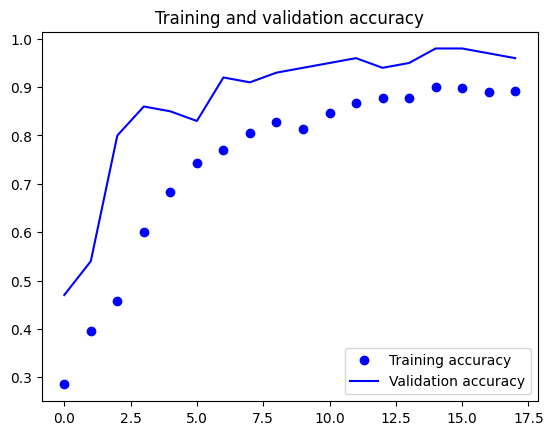

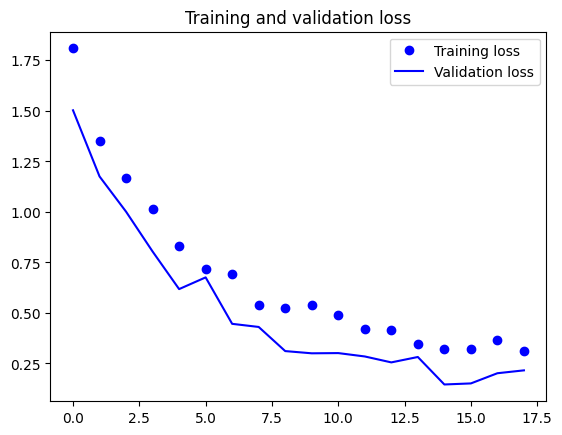

In [17]:
import os
import re
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de datos
train_dir = 'C:\\Eder\\Cosas TEC\\9 Semestre\\Inteligencia Artificial\\Dataset flores\\Train'
test_dir = 'C:\\Eder\\Cosas TEC\\9 Semestre\\Inteligencia Artificial\\Dataset flores\\Test'

images = []
labels = []

# Tamaño al que se redimensionarán las imágenes
target_size = (150, 150)

# Recorrer las carpetas de entrenamiento
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)

    if os.path.isdir(class_path):
        print(f"Leyendo imágenes de la carpeta de entrenamiento {class_folder}")

        for filename in os.listdir(class_path):
            if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
                filepath = os.path.join(class_path, filename)

                # Redimensionar y cargar la imagen
                image = load_img(filepath, target_size=target_size)
                image_array = img_to_array(image)

                images.append(image_array)
                labels.append(class_folder)

# Convertir a numpy array
images = np.array(images)
labels = np.array(labels)

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Dividir datos de entrenamiento en conjuntos de entrenamiento y validación
train_X, val_X, train_Y, val_Y = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

# Normalizar datos de imagen
train_X = train_X.astype('float32') / 255.0
val_X = val_X.astype('float32') / 255.0

# Convertir etiquetas a one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
val_Y_one_hot = to_categorical(val_Y)

# Construir el modelo
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(labels)), activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Aumento de datos
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_X)

# Parada anticipada
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
history = model.fit(datagen.flow(train_X, train_Y_one_hot, batch_size=64), 
                    epochs=18, 
                    validation_data=(val_X, val_Y_one_hot), 
                    callbacks=[early_stop])
# Guardar el modelo
model.save("modelo_flores1.keras")

# Evaluar el modelo en datos de prueba
test_eval = model.evaluate(test_X, test_Y_one_hot, verbose=1)

# Imprimir métricas
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

# Obtener métricas adicionales
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

# Plot de la precisión
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

# Plot de la pérdida
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Archivo: C:\Eder\Cosas TEC\9 Semestre\Inteligencia Artificial\Dataset flores\Pruebasinsanas\61KTbjfuNIL._AC_UF1000,1000_QL80_.jpg
Especie predicha: Girasol
Probabilidades: [2.3222106e-13 1.7756184e-08 2.6911084e-11 6.2214392e-01 3.7785602e-01]




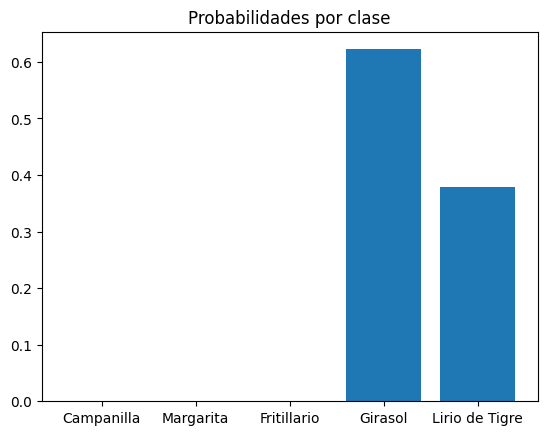

In [5]:
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Directorio donde se encuentra el modelo original
modelo_original_ruta = 'C:\\Eder\\Cosas TEC\\9 Semestre\\Inteligencia Artificial\\modelo_flores.keras'

# Cargar el modelo original
modelo_original = load_model(modelo_original_ruta)

# Directorio donde se encuentran las nuevas imágenes de prueba
directorio_base = 'C:\Eder\Cosas TEC\9 Semestre\Inteligencia Artificial\Dataset flores\Pruebasinsanas'

# Diccionario de mapeo de clases a índices
mapeo_clases_a_indices = {'Campanilla': 0, 'Margarita': 1, 'Fritillario': 2, 'Girasol': 3, 'Lirio de Tigre': 4}

# Invertir el diccionario para obtener un mapeo de índices a nombres de clases
mapeo_indices_a_clases = {v: k for k, v in mapeo_clases_a_indices.items()}

# Recorrer todas las subcarpetas y archivos en el directorio base
for subdir, _, files in os.walk(directorio_base):
    for image_file in files:
        # Cargar la imagen y preprocesarla
        img_path = os.path.join(subdir, image_file)
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Normalizar la imagen

        # Realizar la predicción con el modelo
        predicciones_original = modelo_original.predict(img_array)

        # Imprimir resultados
        print(f'Archivo: {img_path}')
        print(f'Especie predicha: {mapeo_indices_a_clases[np.argmax(predicciones_original[0])]}')
        print(f'Probabilidades:', predicciones_original[0])
        print('\n')

        # Graficar las métricas
        plt.bar(mapeo_clases_a_indices.keys(), predicciones_original[0])
        plt.title('Probabilidades por clase')
        plt.show()

